# **LAB 7**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import catboost as cat
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,log_loss
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
trainData = pd.read_csv('sample_submission.csv')


In [3]:
trainData

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [5]:
def generateXY(trainData):
    x = trainData.drop(columns=['id','target'])
    x = x.fillna(method='ffill')
    x = x.fillna(0)
    y = trainData.target
    return x,y

In [6]:
#Calculate RMSE based on selected features

def calculateRMSE(x,y,features,model):
    for i,val in enumerate(x.columns):
        if val not in features:
            x = x.drop(columns=val)
    X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)
    clf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_val)
    loss = mean_squared_error(y_val,prediction,squared=False)
    print(f"{model} has RMSE = {loss}")
    return clf

In [8]:
x = trainData
featurePC = x.columns.tolist()
print("Selected features: ",featurePC)
x,y = generateXY(trainData)
calculateRMSE(x,y,featurePC,'Before')

Selected features:  ['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']


C:\Users\91935\AppData\Local\Temp\ipykernel_16424\4040299695.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = x.fillna(method='ffill')


Before has RMSE = 1.140533222900855


C:\Users\91935\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

<Axes: >

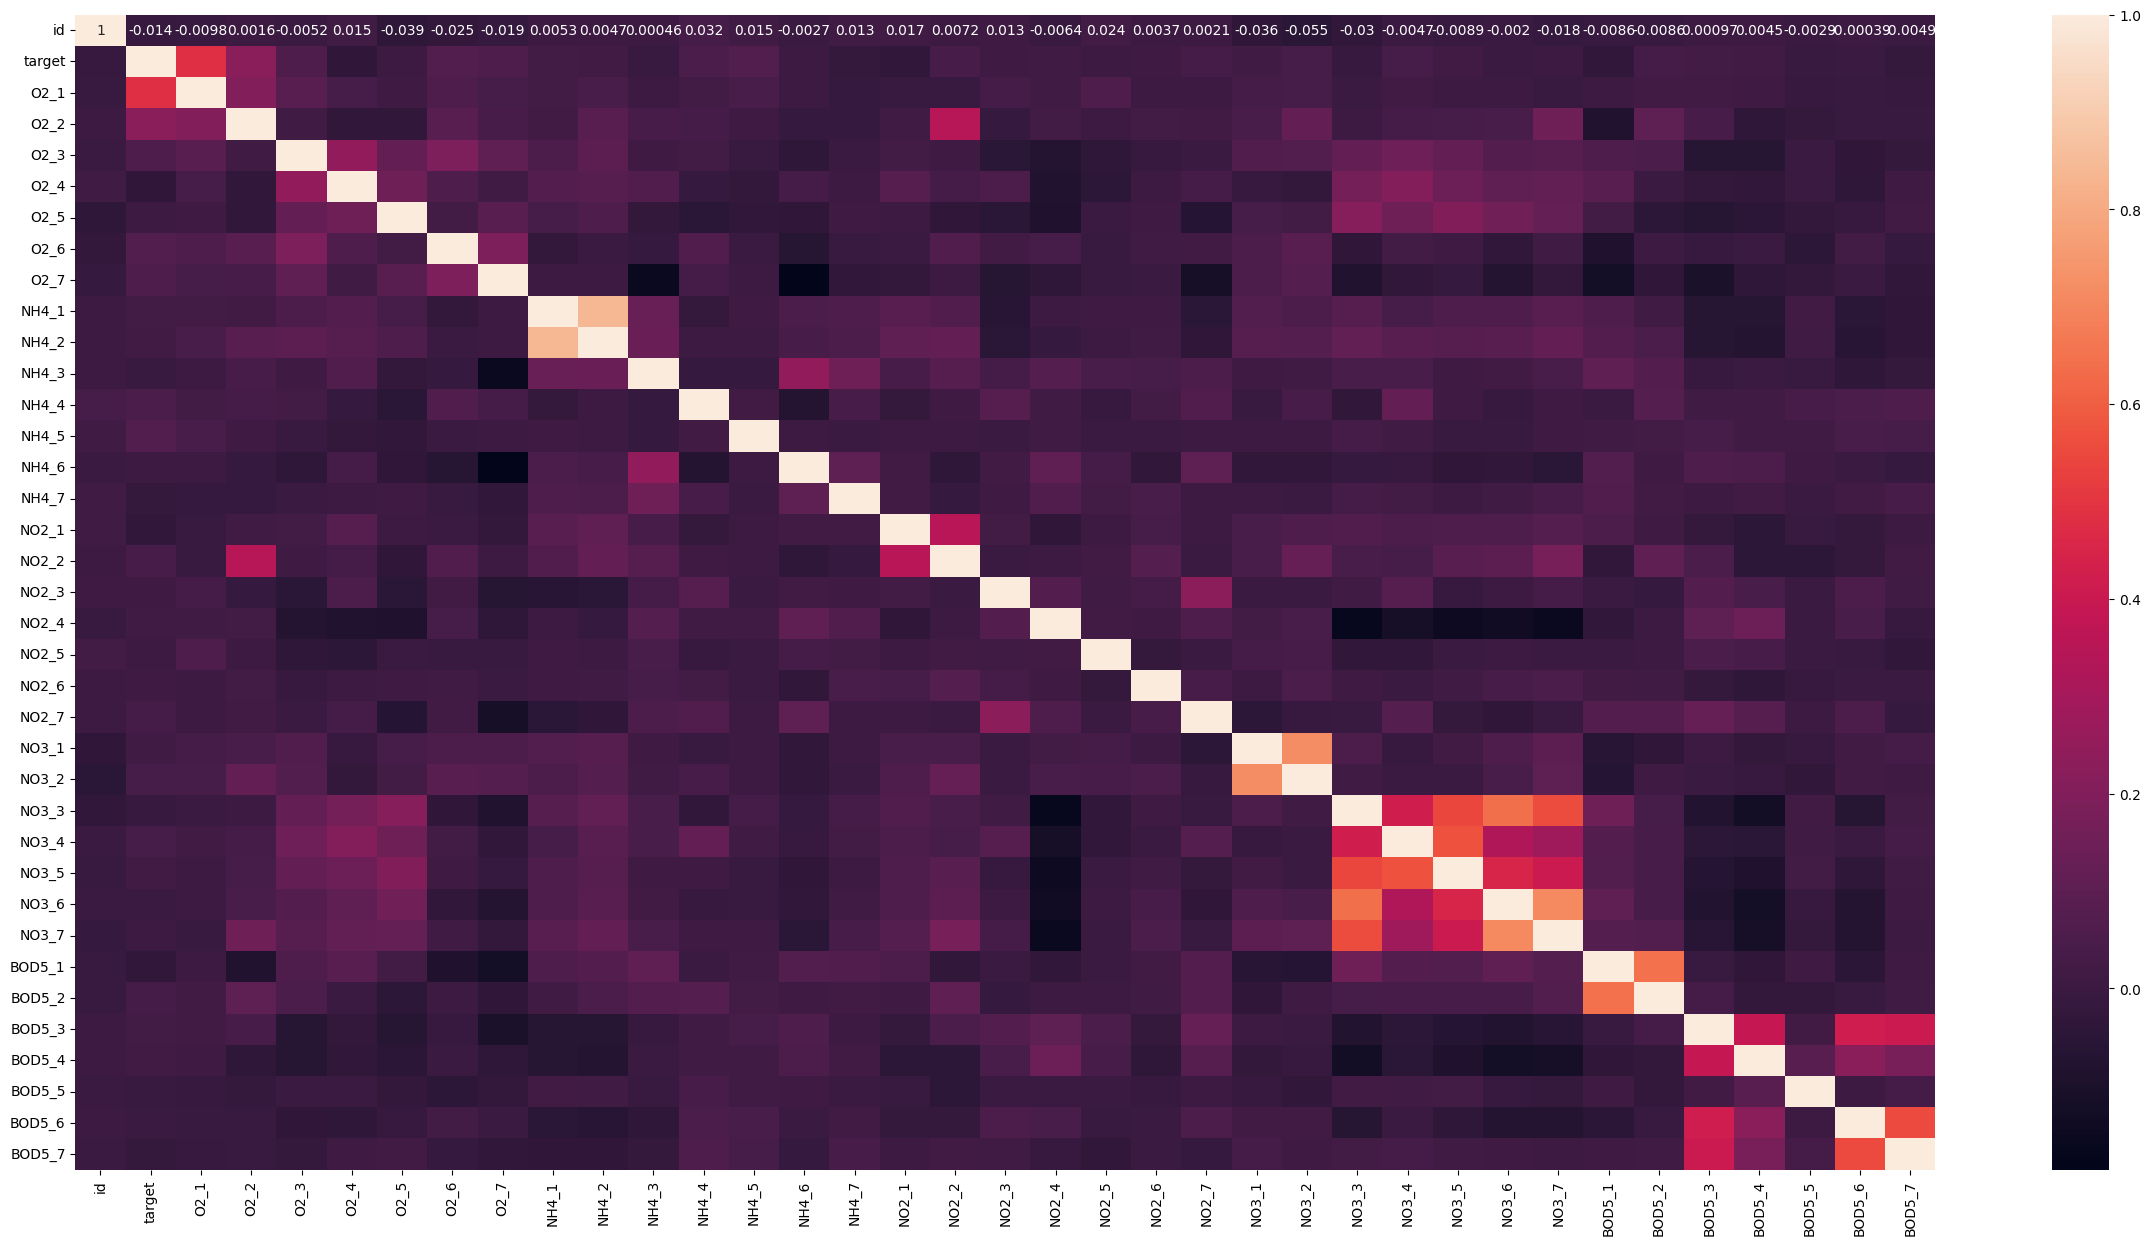

In [9]:
trainCorr = trainData.corr()
plt.figure(figsize=(30,15))
sns.heatmap(trainCorr, annot=True)

In [10]:
threshold = 0.05
corr=abs(trainCorr['target'])
result = corr[corr>threshold]
result.sort_values(ascending=False)

target    1.000000
O2_1      0.481100
O2_2      0.222749
O2_6      0.068118
NH4_5     0.066669
O2_3      0.059053
O2_7      0.058312
Name: target, dtype: float64

In [11]:
columns = trainData.columns.tolist()
highCorrFeature = []

for i in range(5, len(columns)):
    if columns[i] in highCorrFeature:
        continue
    for j in range(i, len(columns)):
        if columns[j] in highCorrFeature:
            continue
        if i != j:
            c = trainData[[columns[i], columns[j]]].corr()
            val = c[columns[j]].iloc[0]  
            if val > 0.5:
                print(f"{columns[i]} and {columns[j]} has high correlation {val}")
                highCorrFeature.append(columns[j])

print(f"\nSize of original data {trainData.shape[1]}, \
number of high correlation features {len(highCorrFeature)}")


NH4_1 and NH4_2 has high correlation 0.8414882929192122
NO3_1 and NO3_2 has high correlation 0.7196981136988061
NO3_3 and NO3_5 has high correlation 0.5421141239762859
NO3_3 and NO3_6 has high correlation 0.6412964900302389
NO3_3 and NO3_7 has high correlation 0.5560658153589086
BOD5_1 and BOD5_2 has high correlation 0.6448950380251364
BOD5_6 and BOD5_7 has high correlation 0.5551490469957154

Size of original data 37, number of high correlation features 7


In [12]:
x = trainData.drop(columns=highCorrFeature)
featurePC = x.columns.tolist()
print("Selected features: ",featurePC)
x,y = generateXY(trainData)
calculateRMSE(x,y,featurePC,'Pearson Correlation')

Selected features:  ['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_3', 'NO3_4', 'BOD5_1', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6']


C:\Users\91935\AppData\Local\Temp\ipykernel_16424\4040299695.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = x.fillna(method='ffill')


Pearson Correlation has RMSE = 1.1421052724730754


C:\Users\91935\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    thresh = 8
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        a = np.argmax(vif)
        print('Max vif is for variable no:',a)
        if (vif[a]<=thresh):
            break
        if (i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif (i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return output

x,y = generateXY(trainData)
x = cal_vif(x)
featureVIF = x.columns.tolist()
print("Selected_features: ",featureVIF)
calculateRMSE(x,y,featureVIF,'Variance Inflation Factor')

C:\Users\91935\AppData\Local\Temp\ipykernel_16424\4040299695.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = x.fillna(method='ffill')


Max vif is for variable no: 5
Max vif is for variable no: 2
Max vif is for variable no: 2
Max vif is for variable no: 26
Max vif is for variable no: 3
Max vif is for variable no: 28
Max vif is for variable no: 3
Max vif is for variable no: 0
Selected_features:  ['O2_1', 'O2_2', 'O2_5', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_7']
Variance Inflation Factor has RMSE = 1.1403397227984158


C:\Users\91935\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)